In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('../images/5.2.09.jpg')

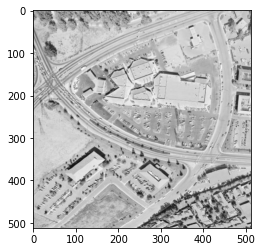

In [3]:
plt.imshow(image);

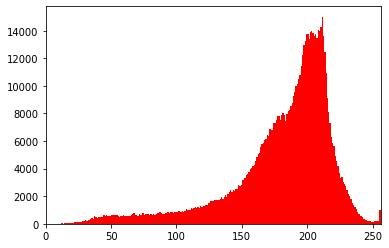

In [16]:
#display the histogram
hist, bins = np.histogram(image.flatten(), 256, [0,256])
plt.hist(image.flatten(), 256, [0,256], color = 'r')
plt.xlim([0,256])
plt.show()

In [ ]:
def histogram_equalization(image_in):
    pass

In [23]:
(cv2.split(image)[0] == image[:,:,0]).sum()

262144